In [31]:
# Cargar librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# **Lectura de datos**

In [32]:
# Lectura de datos

df_original = pd.read_csv('https://raw.githubusercontent.com/SantiRestrepoOlarte/Trabajo_analitica_2/main/ecommerce-data.csv', na_values='?')
df_original.head()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [33]:
# Creación de copia datos
df=df_original.copy()

# **Análisis exploratorio**

In [4]:
# Dimensión del dataset
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## **Datos faltantes**

In [7]:
# Datos faltantes
df.isnull().sum()

Reviews                    0
Reviews_Duration           0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Purchase                   0
dtype: int64

El dataset **no** posee datos faltantes

## Exploración de variables

In [8]:
df.head()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
# Descripción variables númericas
df._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Reviews,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Reviews_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### Matriz de correlación dataset inicial

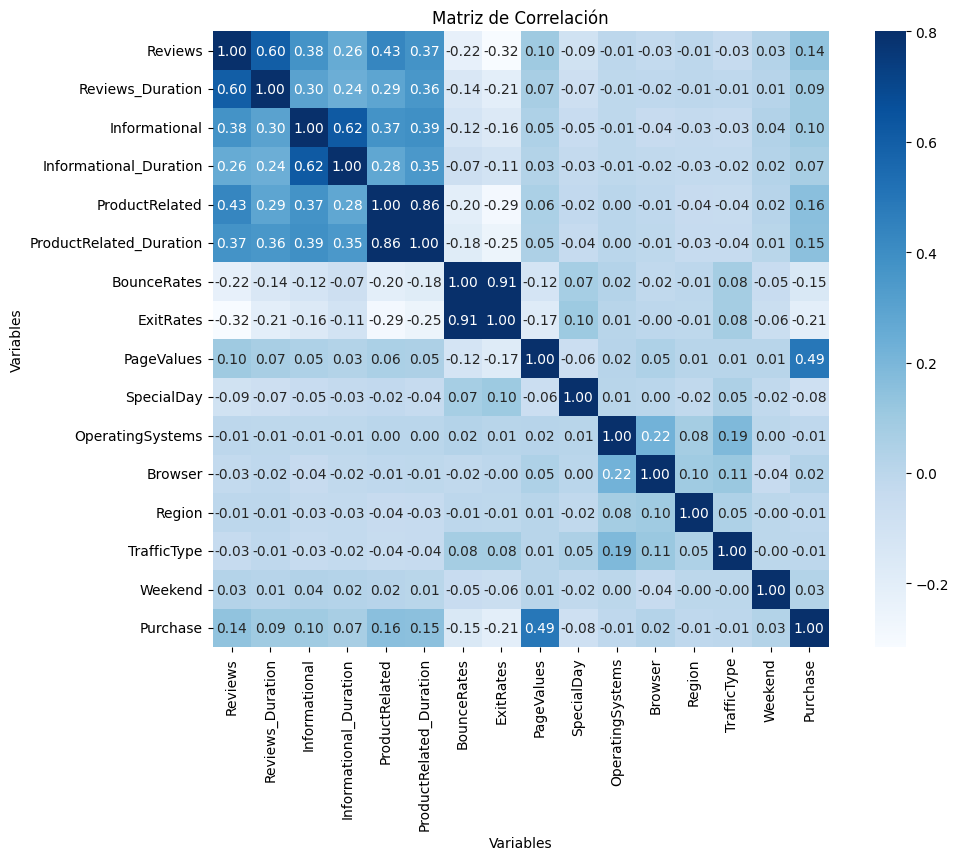

In [15]:
# Matriz de correlación

# Seleccionar columnas numéricas
columnas_numericas = [col for col in df.columns if df[col].dtype != 'object']

# Filtrar DataFrame a las variables numéricas
df_numerico = df[columnas_numericas]

# Calcular la matriz de correlación
corrmat = df_numerico.corr()

# Configurar tamaño de la figura
f, ax = plt.subplots(figsize=(12, 8))

# Mostrar la matriz de correlación como mapa de calor
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, annot_kws={"fontsize": 10}, fmt=".2f", cmap='Blues')

# Agregar título y etiquetas
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar la figura
plt.show()

De la matriz de correlación se pueden extraer algunas consideraciones:
- La varibale 'ProductRelated' posee una alta correlación con la variable 'ProductRelated_Duration', por ende se podría analizar si se pueden eliminar las dos o alguna de ellas para evitar problemas de multicolinealidad.
- La variable 'BounceRates' presenta alta correlación con 'ExitRates', por ende se podría realizar el mismo análisis mencionado anteriormente.
- Sucede un caso parecido a los anteriores entre la variable 'Reviews' y 'Reviews_Duration' y entre 'Informational' e 'Informational_Duration' aunque con una correlación menor que en los casos anteriores.
- Por otra parte, la variable 'Pagevalues' presenta una correlación considerable (en comparación con las otras) con la variable objetivo 'Purchase'

Dicho todo esto, más adelante se procede a realizar análisis univariado y bivariado para determinar otros hallazgos y seleccionar las variables que serán eliminadas.

In [ ]:
# Columna 'Reviews'
df['Reviews'].describe()
df['Reviews'].unique()
df['Reviews'].nunique()
df['Reviews'].value_counts()

In [ ]:
# Columna 'Reviews_Duration'
df['Reviews_Duration'].describe()
#df['Reviews_Duration'].unique()
#df['Reviews_Duration'].nunique()
df['Reviews_Duration'].value_counts()

La variable ***'Reviews_Duration'*** posee la gran mayoría de los datos con valor 0, por ende se puede afirmar que la variable no aportaría información valiosa para los modelos a montar. Dicho esto, esta variable puede ser candidata a ser eliminada del dataset.

In [ ]:
# Columna 'Informational'
#df['Informational'].describe()
#df['Informational'].unique()
#df['Informational'].nunique()
df['Informational'].value_counts()

La variable ***'Informational'*** presenta un comportamiento parecido a la anterior dado que posee gran parte de valores como 0. Por ende, también podría ser eliminada del dataset

In [35]:
# Columna 'Informational_Duration'
#df['Informational_Duration'].describe()
#df['Informational_Duration'].unique()
#df['Informational_Duration'].nunique()
df['Informational_Duration'].value_counts()

Informational_Duration
0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: count, Length: 1258, dtype: int64

Nuevamente, la variable ***'Informational_Duration'*** es candidata a ser eliminada del dataset por su gran cantidad de valores 0.

In [ ]:
# Columna 'ProductRelated'
df['ProductRelated'].describe()
df['ProductRelated'].unique()
df['ProductRelated'].nunique()
df['ProductRelated'].value_counts()

In [34]:
# Columna 'ProductRelated_Duration'
df['ProductRelated_Duration'].describe()
df['ProductRelated_Duration'].unique()
df['ProductRelated_Duration'].nunique()
df['ProductRelated_Duration'].value_counts()

ProductRelated_Duration
0.000000      755
17.000000      21
11.000000      17
8.000000       17
15.000000      16
             ... 
964.070513      1
593.507143      1
831.388889      1
922.208333      1
346.000000      1
Name: count, Length: 9551, dtype: int64

La variable ***'ProductRelated_Duration'*** también es candidata a ser eliminada dada la gran cantidad de datos con valor 0 con los que cuenta.

In [ ]:
# Columna 'BounceRates'
df['BounceRates'].describe()
df['BounceRates'].unique()
#df['BounceRates'].nunique()
df['BounceRates'].value_counts()

La variable ***'BounceRates'*** presenta un comportamiento similar

In [ ]:
# Columna 'ExitRates'
df['ExitRates'].describe()
#df['ExitRates'].unique()
#df['ExitRates'].nunique()
df['ExitRates'].value_counts()

In [ ]:
# Columna 'PageValues'
df['PageValues'].describe()
df['PageValues'].unique()
df['PageValues'].nunique()
df['PageValues'].value_counts()

La variable ***'PageValues'*** cuenta con más del 80% de sus observaciones como 0, sin embargo se debe realizar un análisis un poco más cuidadoso dado que esta variable presenta una correlación considerable con la variable objetivo

In [ ]:
# Columna 'SpecialDay'
df['SpecialDay'].describe()
df['SpecialDay'].unique()
df['SpecialDay'].nunique()
df['SpecialDay'].value_counts()

A pesar de que la variable ***'SpecialDay'*** presenta gran parte de sus valores con valor 0 pues no se decide eliminar por tal razón dada la naturaleza y significado de la variable. Todo esto, dado que un valor 0 acá puede contener información valiosa, al igual que los demás valores de la variable.

In [ ]:
# Columna 'Month'
df['Month'].describe()
df['Month'].unique()
df['Month'].nunique()
df['Month'].value_counts()

La columna ***'Month'*** posee la particularidad de que no cuenta con observaciones del mes de enero ni abril.

In [ ]:
# Columna 'OperatingSystems'
df['OperatingSystems'].describe()
df['OperatingSystems'].unique()
df['OperatingSystems'].nunique()
df['OperatingSystems'].value_counts()

In [ ]:
# Columna 'Browser'
df['Browser'].describe()
df['Browser'].unique()
df['Browser'].nunique()
df['Browser'].value_counts()

In [ ]:
# Columna 'Region'
df['Region'].describe()
#df['Region'].unique()
df['Region'].nunique()
df['Region'].value_counts()

In [ ]:
# Columna 'TrafficType'
df['TrafficType'].describe()
df['TrafficType'].unique()
df['TrafficType'].nunique()
df['TrafficType'].value_counts()

In [ ]:
# Columna 'VisitorType'
#df['VisitorType'].describe()
df['VisitorType'].unique()
#df['VisitorType'].nunique()
df['VisitorType'].value_counts()

In [ ]:
# Columna 'Weekend'
df['Weekend'].describe()
#df['Weekend'].unique()
#df['Weekend'].nunique()
df['Weekend'].value_counts()

In [ ]:
# Columna 'Purchase' (VARIABLE OBJETIVO)
df['Purchase'].describe()
df['Purchase'].unique()
df['Purchase'].nunique()
df['Purchase'].value_counts()

In [38]:
total=10422+1908
total1=1908/total
total0=10422/total

total1,total0

# Variable objetivo desbalanceada
# 84.52% es 0 (no compra)
# 15.48% es 1 (compra)

(0.15474452554744525, 0.8452554744525548)

[Text(0, 0, '0'), Text(1, 0, '1')]

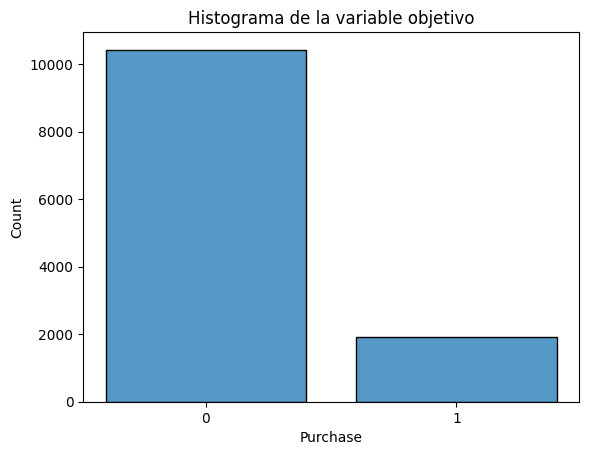

In [37]:
ax = sns.histplot(data=df, x='Purchase', bins=[0, 0.5, 1.5], discrete=True, shrink=0.8)

plt.xlabel('Purchase')
plt.ylabel('Count')
plt.title('Histograma de la variable objetivo')

ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])

En cuanto a la variable objetivo ***'Purchase'*** se concluye que posee una distribución desbalanceada dado que apróximadamente el 85% de las observaciones son clasificadas como 0 y el 15% restante como 1. 

Además, dada la distribución de las variables ***'SpecialDay'***, ***'OperatingSystems'***, ***'Browser'***, ***'Region'*** y ***'TrafficType'*** se podrían tratar como variables categóricas cambiando su tipología a 'object'. Además, las variables ***'Month'***, ***'VisitorType'*** y ***'Weekend'*** se mantienen tal cual.

# Datos duplicados

In [36]:
duplicados=df.duplicated()
df[duplicados]

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


El dataset posee 125 observaciones duplicadas, las cuales se proceden a eliminar

In [37]:
# Eliminación de datos duplicados
df=df.drop_duplicates()

In [6]:
# Comprobación datos duplicados
duplicados=df.duplicated()
df[duplicados]

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase


### **Análisis univariado**

In [39]:
# Definición de variables para graficar
variables = ['Reviews', 'Reviews_Duration', 'Informational','Informational_Duration']
variables2 = ['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']
variables3 = ['PageValues', 'SpecialDay', 'OperatingSystems']
variables4 = ['Browser', 'Region', 'TrafficType']

In [41]:
# Funciones paea gráficos de caja para las variables numéricas

def graficar_boxplots_3(df, variables):
  # Seleccionar las variables
  df_subset = df[variables]

  # Graficar boxplots
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))
  for i, variable in enumerate(variables):
    sns.boxplot(data=df_subset[variable], ax=axes[i])
    axes[i].set_title(variable)

  # Ajustar la figura
  plt.tight_layout()
  plt.show()

def graficar_boxplots_4(df, variables):
  # Seleccionar las variables
  df_subset = df[variables]

  # Graficar boxplots
  fig, axes = plt.subplots(1, 4, figsize=(15, 5))
  for i, variable in enumerate(variables):
    sns.boxplot(data=df_subset[variable], ax=axes[i])
    axes[i].set_title(variable)

  # Ajustar la figura
  plt.tight_layout()
  plt.show()

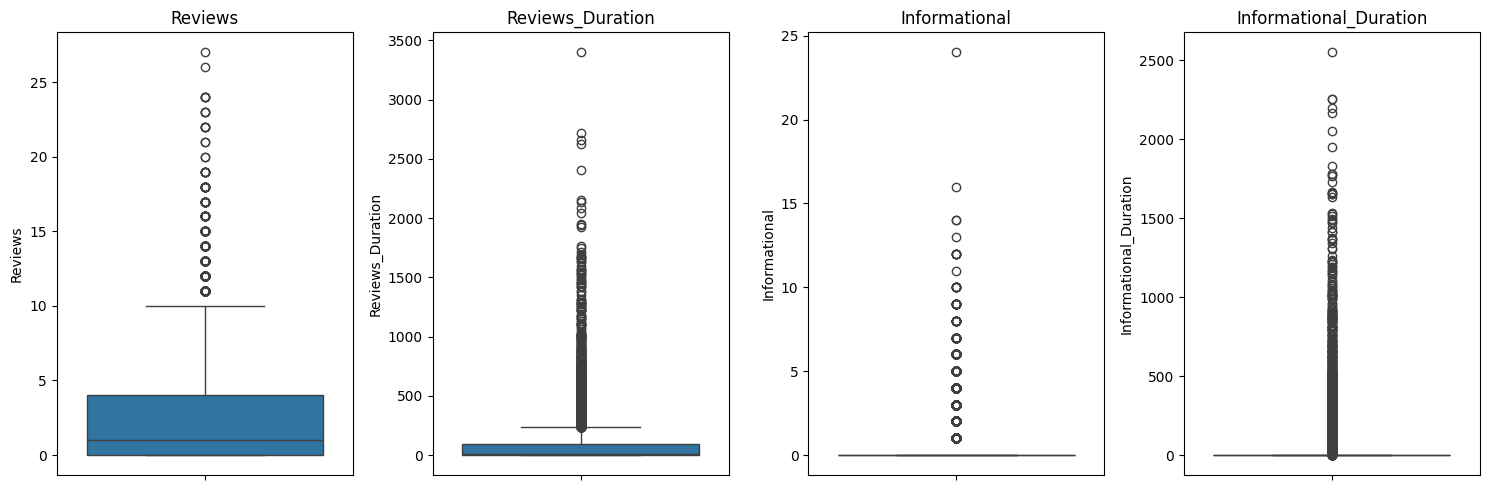

In [42]:
graficar_boxplots_4(df, variables)

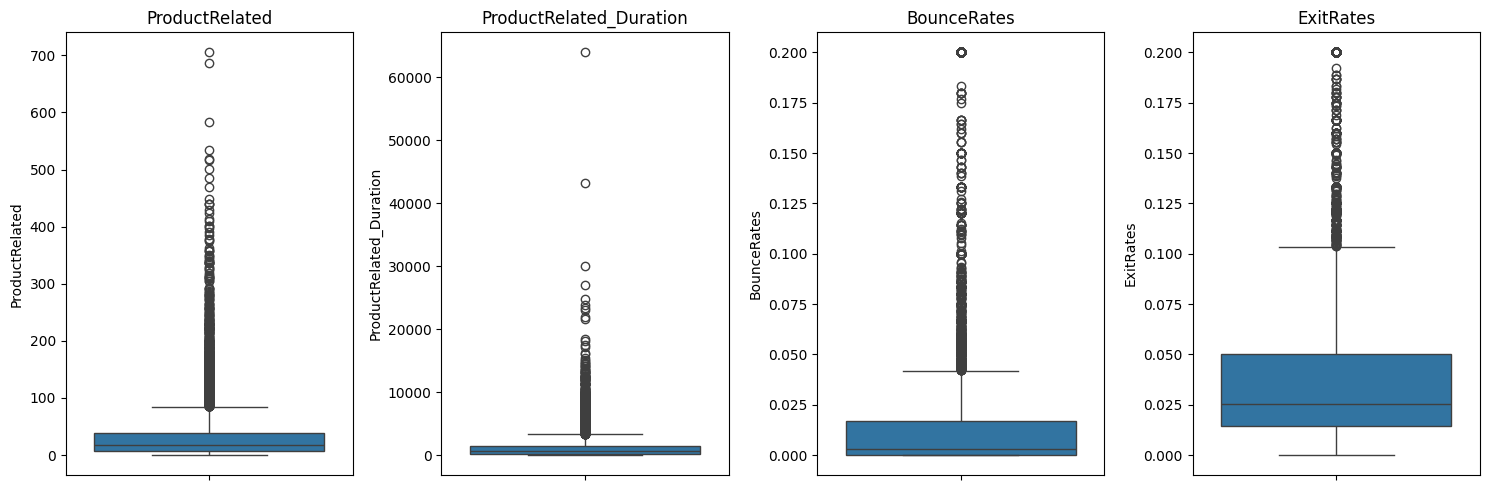

In [43]:
graficar_boxplots_4(df, variables2)

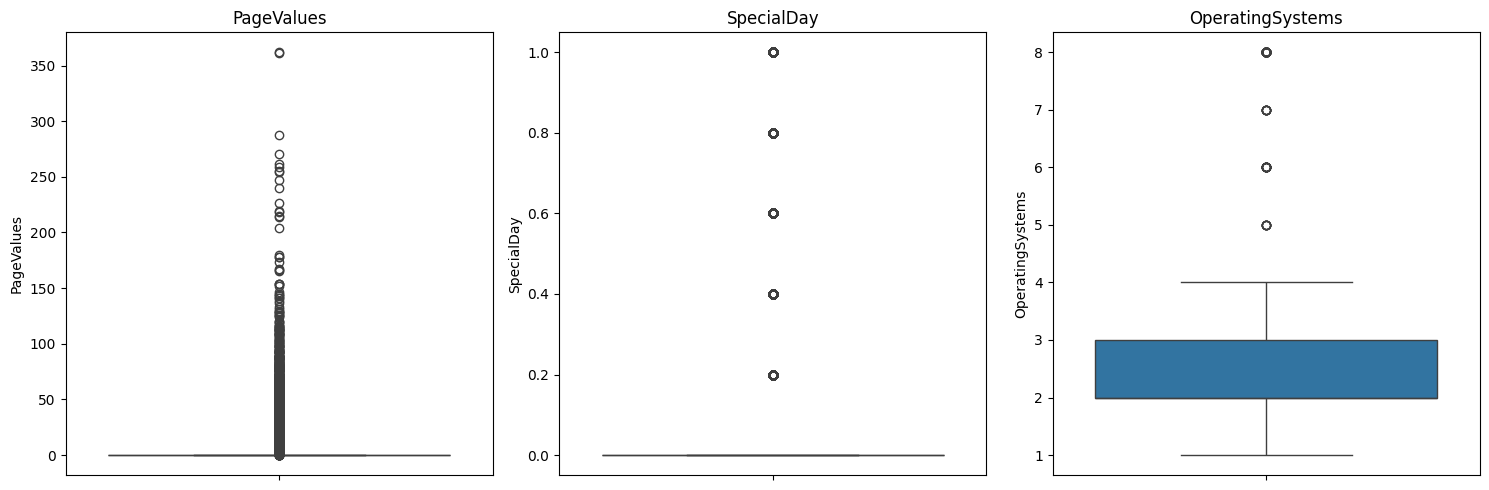

In [11]:
graficar_boxplots_3(df,variables3)

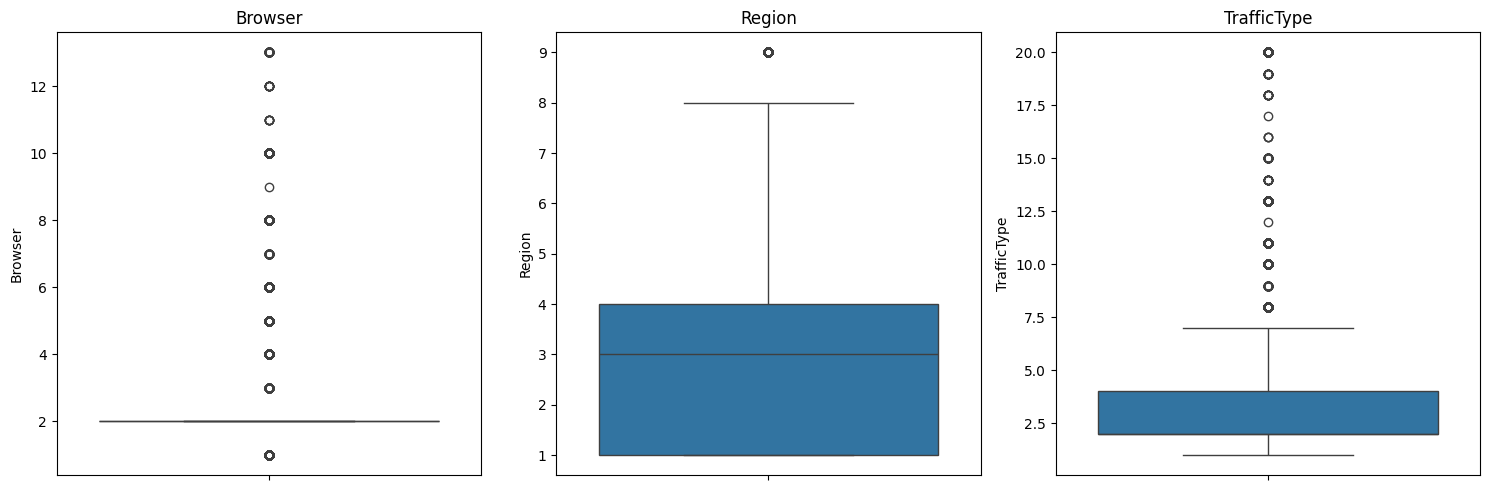

In [12]:
graficar_boxplots_3(df,variables4)

De los boxplots se evidencia la presencia de una gran cantidad de datos atípicos en la mayoría de variables númericas por lo que es necesario un tratamiento de las variables para realizar una limpieza del dataset.

### **Análisis bivariado**

In [20]:
df.columns

Index(['Reviews', 'Reviews_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Purchase'],
      dtype='object')

<Axes: xlabel='Purchase', ylabel='Reviews'>

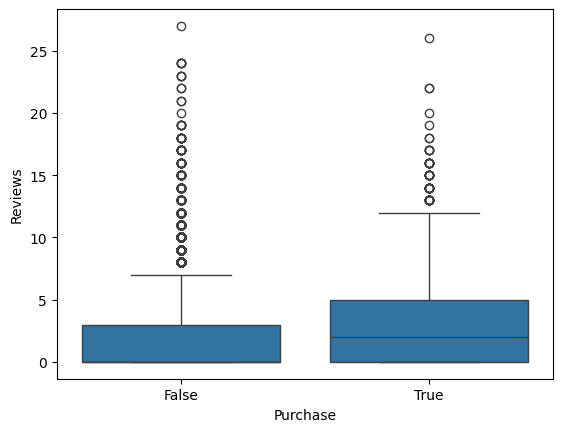

In [44]:
# Reviews con Purchase

# Seleccionar variables
variable_numerica = df['Reviews']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

<Axes: xlabel='Purchase', ylabel='Reviews_Duration'>

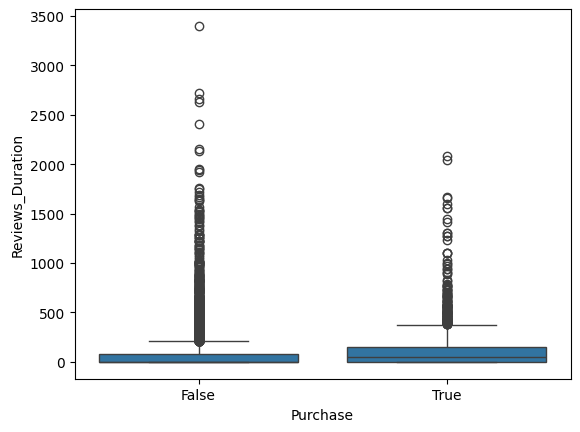

In [45]:
# Reviews_Duration con Purchase

# Seleccionar variables
variable_numerica = df['Reviews_Duration']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

La variable ***'Reviews_Duration'*** no parece mostrar una varianza considerable de la variable objetivo ***'Purchase'***, por ende no generaría problemas la eliminación de esta variable. 

<Axes: xlabel='Purchase', ylabel='Informational'>

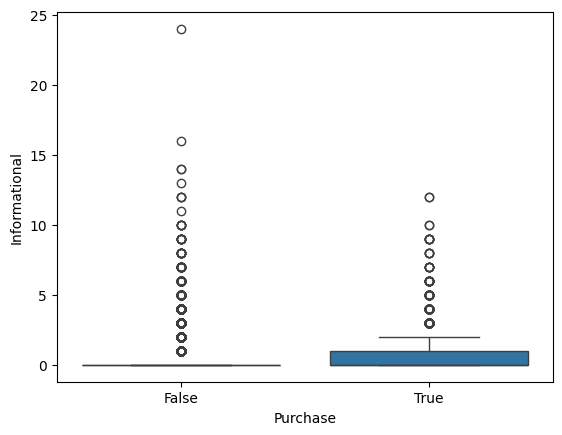

In [46]:
# Informational con Purchase

# Seleccionar variables
variable_numerica = df['Informational']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

<Axes: xlabel='Purchase', ylabel='Informational_Duration'>

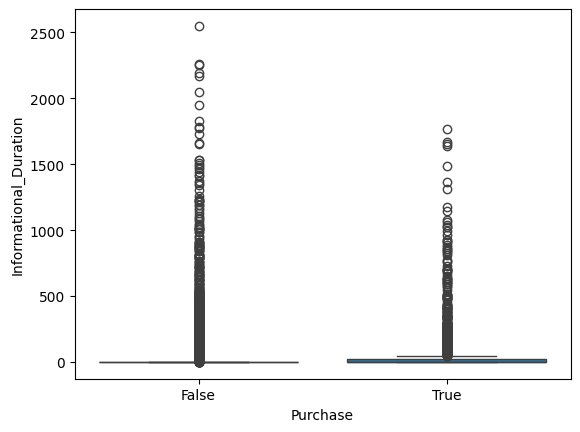

In [47]:
# Informational_Duration con Purchase

# Seleccionar variables
variable_numerica = df['Informational_Duration']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

Tanto la variable ***'Informational'*** como ***'Informational_Duration'*** presentan un comportamiento similar en el cual sus valores no arrojan información tan relevante, y además la gran cantidad de datos atípicos no permite concluir de forma clara.

<Axes: xlabel='Purchase', ylabel='ProductRelated'>

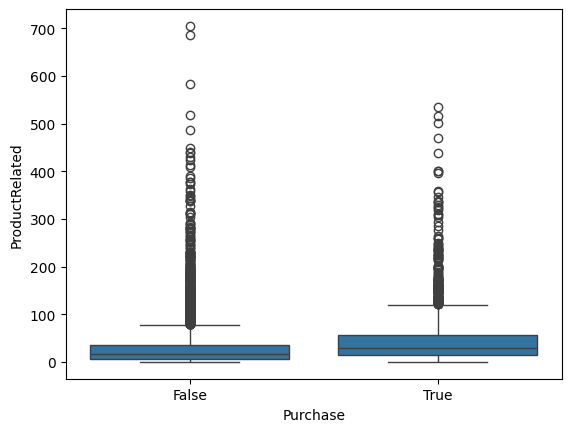

In [48]:
# ProductRelated con Purchase

# Seleccionar variables
variable_numerica = df['ProductRelated']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

<Axes: xlabel='Purchase', ylabel='ProductRelated_Duration'>

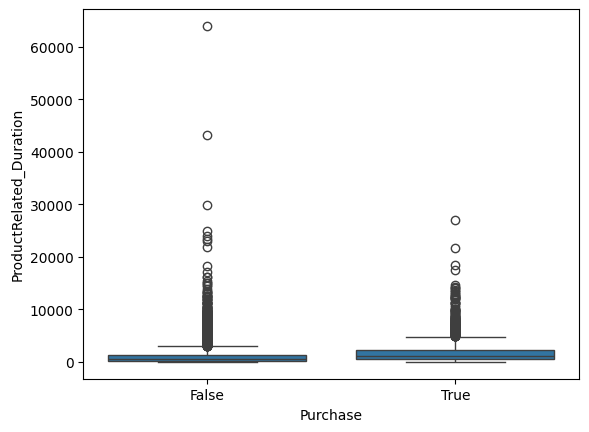

In [49]:
# ProductRelated_Duration con Purchase

# Seleccionar variables
variable_numerica = df['ProductRelated_Duration']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

Dado que las variables independientes ***'ProductRelated'*** y ***'ProductRelated_Duration'*** poseen una correlación alta entre ellas, se decide descartar la variable ***'ProductRelated_Duration'*** dado que parece ser la variable que menos aporta o explica al modelo.

<Axes: xlabel='Purchase', ylabel='BounceRates'>

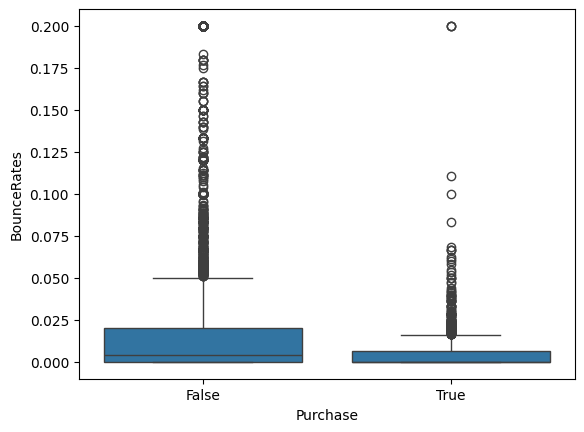

In [50]:
# BounceRates con Purchase

# Seleccionar variables
variable_numerica = df['BounceRates']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

<Axes: xlabel='Purchase', ylabel='ExitRates'>

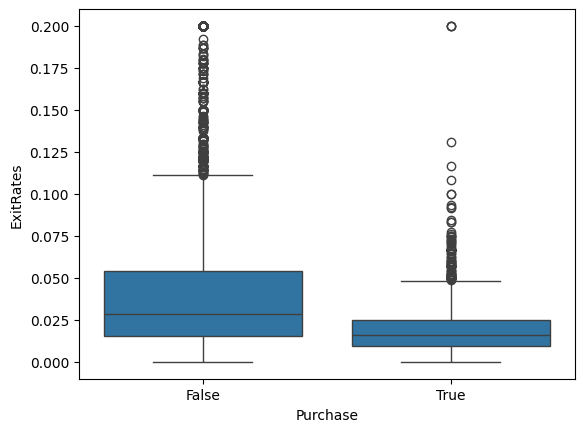

In [51]:
# ExitRates con Purchase

# Seleccionar variables
variable_numerica = df['ExitRates']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

Como con las variables ***'BounceRates'*** y ***'ExitRates'*** se presenta una situación similar a la anterior (correlación entre ellas) se decide eliminar ***'BounceRates'*** dado que es la que menos explica.

<Axes: xlabel='Purchase', ylabel='PageValues'>

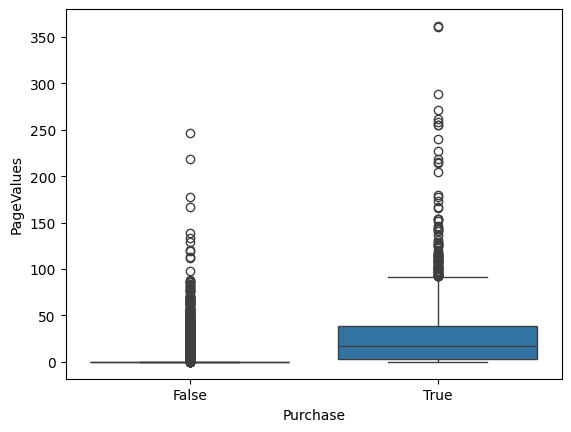

In [52]:
# PageValues con Purchase

# Seleccionar variables
variable_numerica = df['PageValues']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

La variable ***'PageValues'*** parece mostrar...





<Axes: xlabel='Purchase', ylabel='OperatingSystems'>

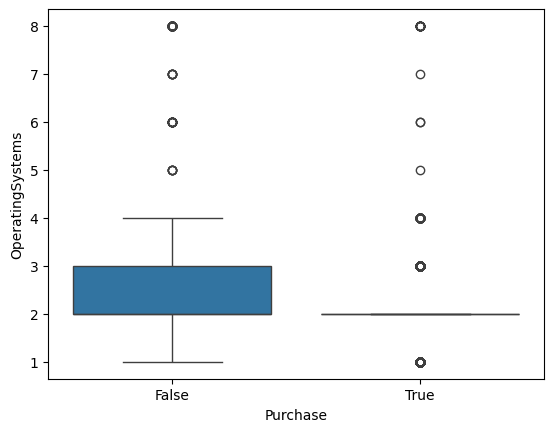

In [60]:
# OperatingSystems con Purchase

# Seleccionar variables
variable_numerica = df['OperatingSystems']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

# Tratamiento de datos atípicos

### Eliminación de variables que no aportan

Como se mencionó en el análisis exploratorio se va a realizar la eliminación de las variables ***'Informational'***, ***'Informational_Duration'***, ***'ProductRelated_Duration'***, ***'Reviews_Duration'*** y ***'BounceRates'***

In [7]:
# Eliminación de la columna 'Informational'
df = df.drop('Informational', axis=1)

In [8]:
# Eliminación de la columna 'Informational_Duration'
df = df.drop('Informational_Duration', axis=1)

In [9]:
# Eliminación de la columna 'Reviews_Duration'
df = df.drop('Reviews_Duration', axis=1)

In [10]:
# Eliminación de la columna 'BounceRates'
df = df.drop('BounceRates', axis=1)

In [11]:
# Eliminación de la columna 'ProductRelated_Duration'
df = df.drop('ProductRelated_Duration', axis=1)

### Tratamiento

Ahora, para las variables númericas que se conservan se decide eliminar las observaciones que se encuentren por encima del tercer cuartil (25% de las observaciones más cercanas al dato más alto)

In [12]:
def eliminar_atipicos_cuartil(df, columna):
    # Calcular el límite superior del cuarto cuartil
    q3 = df[columna].quantile(0.75)
    # Calcular el rango intercuartílico
    iqr = df[columna].quantile(0.75) - df[columna].quantile(0.25)
    # Calcular el límite superior de los valores no atípicos
    limite_superior = q3 + 1.5 * iqr
    # Filtrar el DataFrame para excluir valores atípicos
    df_sin_atipicos = df.loc[df[columna] <= limite_superior]
    
    return df_sin_atipicos

In [13]:
df_sin_atipicos = eliminar_atipicos_cuartil(df, 'Reviews')

In [11]:
#df_sin_atipicos = eliminar_atipicos_cuartil(df_sin_atipicos, 'Reviews_Duration')

In [14]:
df_sin_atipicos = eliminar_atipicos_cuartil(df_sin_atipicos, 'ProductRelated')

In [13]:
#df_sin_atipicos = eliminar_atipicos_cuartil(df_sin_atipicos, 'ProductRelated_Duration')

In [15]:
#df_sin_atipicos = eliminar_atipicos_cuartil(df_sin_atipicos, 'PageValues')

In [14]:
#df_sin_atipicos = eliminar_atipicos_cuartil(df_sin_atipicos, 'BounceRates')

In [15]:
df_sin_atipicos = eliminar_atipicos_cuartil(df_sin_atipicos, 'ExitRates')

In [16]:
df_sin_atipicos

,Reviews,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
1,0,2,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
4,0,10,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,19,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0,2,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,3,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,53,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,5,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,6,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,15,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Una vez eliminadas las variables que no aportan información y haber realizado el tratamiento de datos atípicos, el dataframe resultante posee 9916 observaciones y un total de 13 columnas. Ahora, se procede a graficar los boxplots de las variables númericas para evidenciar el comportamiento con el nuevo dataset.

### Boxplots después de tratar datos atípicos

In [72]:
variables_atip = ['Reviews', 'PageValues', 'ProductRelated']
variables2_atip = ['ExitRates', 'SpecialDay', 'OperatingSystems']
variables3_atip = ['Browser', 'Region', 'TrafficType']

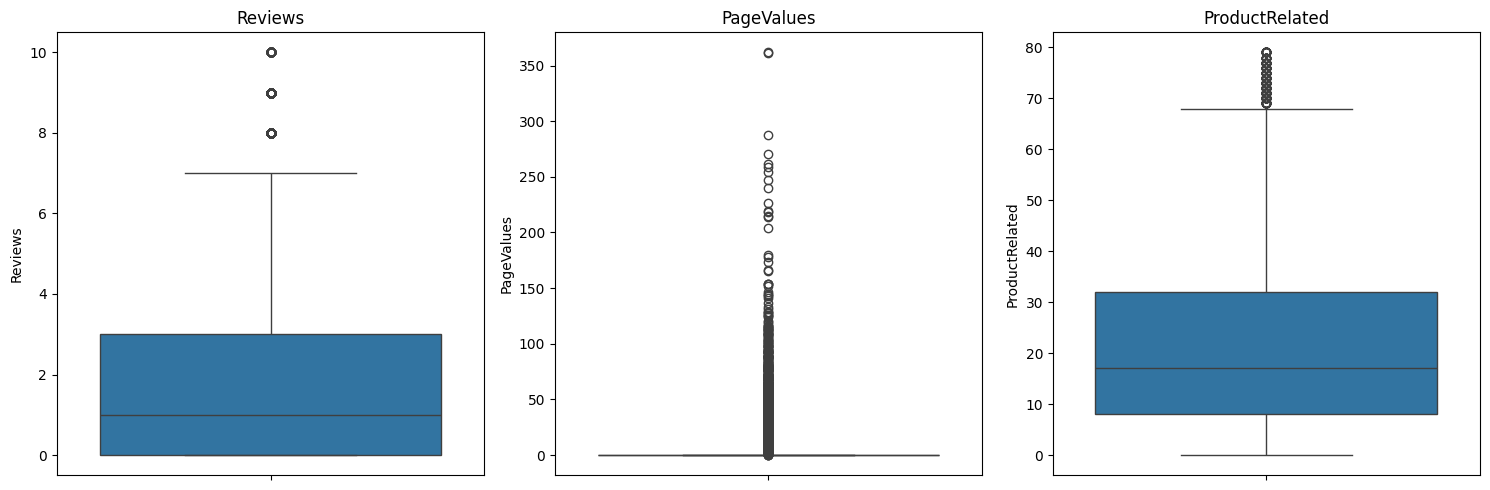

In [73]:
graficar_boxplots_3(df_sin_atipicos, variables_atip)

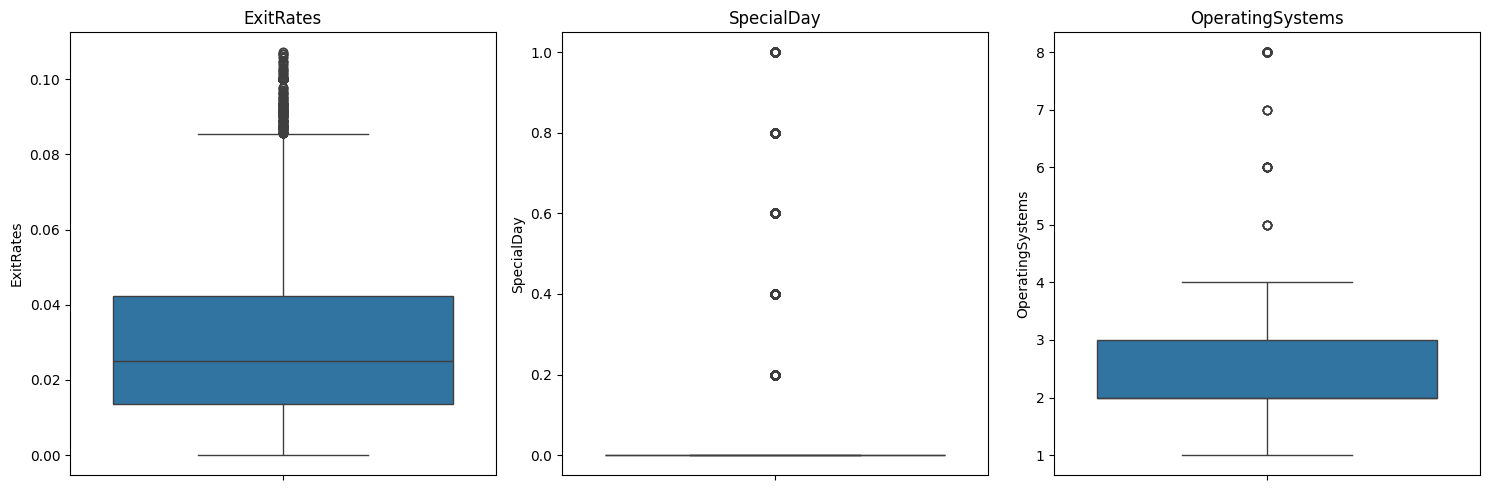

In [74]:
graficar_boxplots_3(df_sin_atipicos, variables2_atip)

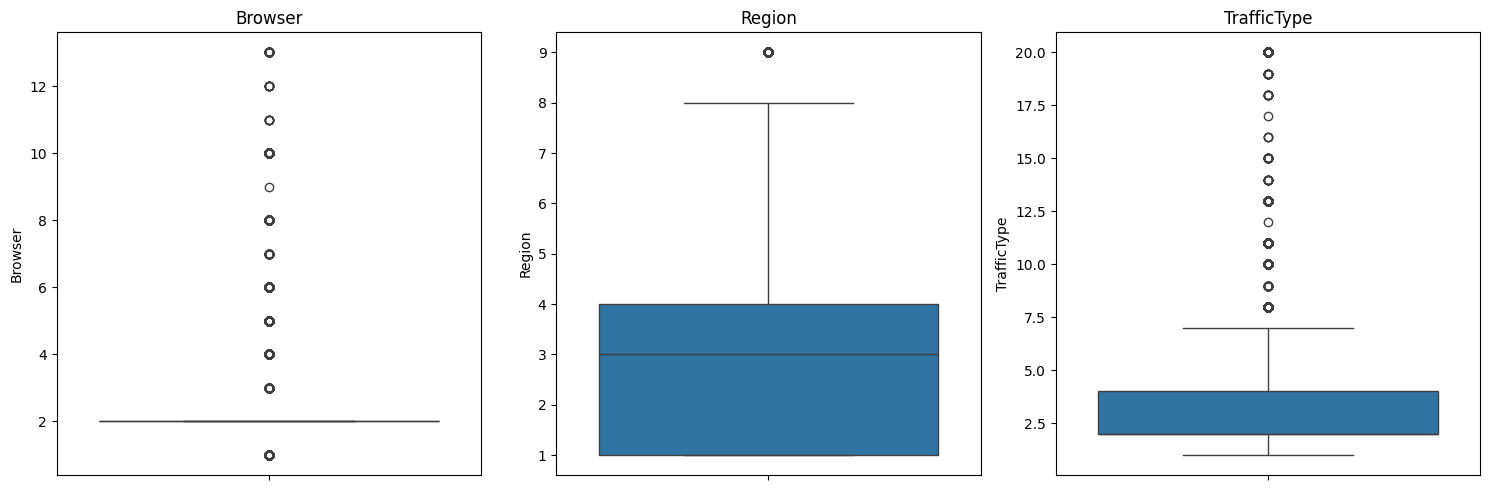

In [75]:
graficar_boxplots_3(df_sin_atipicos, variables3_atip)

# **Transformación de variables**

Además, para las variables ***'Weekend'*** y ***'Purchase'*** que están en tipo booleano como True and False se transforman a tipo bool pero 1 (True) y 0 (False) 

In [17]:
# Variable 'Weekend' y la variable objetivo 'Purchase'
week_var = {
    False: 0,
    True: 1
}

df_sin_atipicos['Weekend'] = df_sin_atipicos['Weekend'].replace(week_var)
df_sin_atipicos['Purchase'] = df_sin_atipicos['Purchase'].replace(week_var)


In [18]:
df_sin_atipicos.head(3)

,Reviews,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
1,0,2,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
4,0,10,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
5,0,19,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,0,0


In [91]:
df_sin_atipicos.columns

Index(['Reviews', 'ProductRelated', 'ExitRates', 'PageValues', 'SpecialDay',
       'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Purchase'],
      dtype='object')

In [19]:
# Categorizarización de variables

variables_numericas = ['SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType']

for variable in variables_numericas:
  df_sin_atipicos[variable] = df_sin_atipicos[variable].astype('object') 

In [20]:
df_sin_atipicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9900 entries, 1 to 12329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Reviews           9900 non-null   int64  
 1   ProductRelated    9900 non-null   int64  
 2   ExitRates         9900 non-null   float64
 3   PageValues        9900 non-null   float64
 4   SpecialDay        9900 non-null   object 
 5   Month             9900 non-null   object 
 6   OperatingSystems  9900 non-null   object 
 7   Browser           9900 non-null   object 
 8   Region            9900 non-null   object 
 9   TrafficType       9900 non-null   object 
 10  VisitorType       9900 non-null   object 
 11  Weekend           9900 non-null   int64  
 12  Purchase          9900 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 1.1+ MB


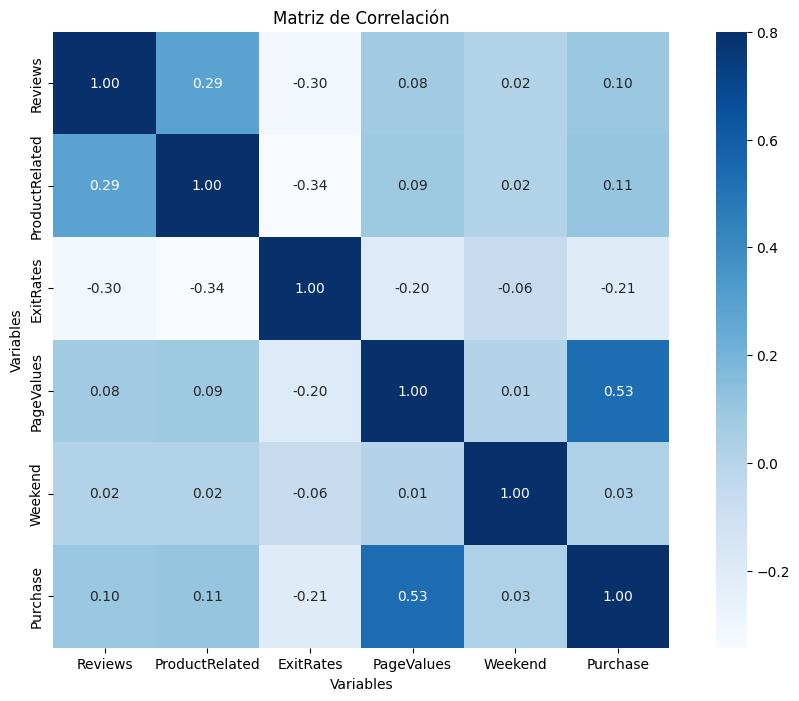

In [99]:
# Matriz de correlación

# Seleccionar columnas numéricas
columnas_numericas = [col for col in df_sin_atipicos.columns if df_sin_atipicos[col].dtype != 'object']

# Filtrar DataFrame a las variables numéricas
df_numerico = df_sin_atipicos[columnas_numericas]

# Calcular la matriz de correlación
corrmat = df_numerico.corr()

# Configurar tamaño de la figura
f, ax = plt.subplots(figsize=(12, 8))

# Mostrar la matriz de correlación como mapa de calor
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, annot_kws={"fontsize": 10}, fmt=".2f", cmap='Blues')

# Agregar título y etiquetas
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar la figura
plt.show()


# **Selección de características**

Antes de proceder con la selección de características se procede a conseguir el dataset en formato dummy y posteriormente el escalado de los datos

### Formato dummy

In [21]:
df_dummies = pd.get_dummies(df_sin_atipicos)

In [22]:
df_dummies.head()

,Reviews,ProductRelated,ExitRates,PageValues,Weekend,Purchase,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
1,0,2,0.100000,0.0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,10,0.050000,0.0,1,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,0,19,0.024561,0.0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,0,2,0.100000,0.0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,0,3,0.022222,0.0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


### Escalado de los datos

In [23]:
# Separación de caracteristicas y target (X , y)
y = df_dummies['Purchase']
X = df_dummies.drop(['Purchase'], axis=1)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:",  X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes(exclude='object').columns)

#Estandarización de variables númericas
pipeline = ColumnTransformer([('num',MinMaxScaler() , numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (7920, 74)
Tamaño del conjunto de validación: (1980, 74)


In [26]:
df_scaled = pd.DataFrame(X_train_std,columns=X.columns)
df_scaled

,Reviews,ProductRelated,ExitRates,PageValues,Weekend,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.2,0.088608,0.485294,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.1,0.379747,0.150210,0.009300,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.2,0.417722,0.244550,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.7,0.354430,0.089599,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.202532,0.681723,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0.2,0.291139,0.125668,0.081404,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7916,0.3,0.025316,0.388235,0.077001,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7917,0.0,0.455696,0.175373,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7918,0.2,0.151899,0.138655,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
df_scaled.columns

Index(['Reviews', 'ProductRelated', 'ExitRates', 'PageValues', 'Weekend',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4', 'SpecialDay_0.6',
       'SpecialDay_0.8', 'SpecialDay_1.0', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13',
       'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6',
       'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'TrafficType_8', 'Tr

In [14]:
X_Purchase = df_dummies.drop(columns=['Purchase'])
y_Purchase = df_dummies['Purchase']

In [11]:
# Separación de caracteristicas y target
X_Purchase = df_dummies.drop(['Purchase'], axis=1)
y_Purchase = df_dummies['Purchase']

print(X_Purchase.shape)
print(y_Purchase.shape)

(12205, 28)
(12205,)


## Método de filtrado

In [13]:
# Variance Threshold

from sklearn.feature_selection import VarianceThreshold

#Función de filtro de caracteristicas
def variance_threshold(X,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(X)
    new_cols = var_thres.get_support()
    return new_cols

In [14]:
# Para clasificación  #Elimina las caracteristicas con poca información util
# Se utiliza este metodo ya que la variable objetido es binaria

# Obtener columnas seleccionadas
X_new_class = variance_threshold(X_Purchase, 0.25)
# Nuevo df
df_classification = X_Purchase.iloc[:,X_new_class]
df_classification.head()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.0,3,3,1,4


In [15]:
X_Purchase.iloc[:,X_new_class].columns

Index(['Reviews', 'Reviews_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'PageValues', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

## Método Wrapper

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

In [29]:
# Para clasificación

# Establecer Estimador
model = LogisticRegression(max_iter= 500)
# Obtener columnas seleciconadas - (8 caracteristicas)
X_new_class = recursive_feature_selection(X_Purchase, y_Purchase, model, 15)
# Nuevo conjunto de datos
df_classification_new = X_Purchase.iloc[:,X_new_class]
df_classification_new.head()

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Num Features: 15
Selected Features: [False False  True False False False  True  True False  True False False
 False False  True  True  True  True  True  True  True False  True  True
  True False False  True]
Feature Ranking: [ 8 13  1 12 10 14  1  1  4  1  5  6  9 11  1  1  1  1  1  1  1  3  1  1
  1  7  2  1]


,Informational,BounceRates,ExitRates,SpecialDay,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_Nov,Month_Oct,Month_Sep,VisitorType_Returning_Visitor
0,0,0.20,0.20,0.0,False,False,False,True,False,False,False,False,False,False,True
1,0,0.00,0.10,0.0,False,False,False,True,False,False,False,False,False,False,True
2,0,0.20,0.20,0.0,False,False,False,True,False,False,False,False,False,False,True
3,0,0.05,0.14,0.0,False,False,False,True,False,False,False,False,False,False,True
4,0,0.02,0.05,0.0,True,False,False,True,False,False,False,False,False,False,True


In [31]:
X_Purchase.iloc[:,X_new_class].columns

Index(['Informational', 'BounceRates', 'ExitRates', 'SpecialDay', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Returning_Visitor'],
      dtype='object')

# Métodos integrados

In [32]:
# Select from model

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np

# Estandarizar los datos
standard_scaler = StandardScaler()
X_reg_std = standard_scaler.fit_transform(X_Purchase)
y_reg_std = standard_scaler.fit_transform(np.array(y_Purchase).reshape(-1, 1))

# Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=0.03), max_features=15)
sel_.fit(X_reg_std, y_reg_std)
print(sel_.estimator_.coef_)
#Obtener variables seleccionadas
X_new_reg = sel_.get_support()

df_regression_new_2 = X_Purchase.iloc[:,X_new_reg]
df_regression_new_2.head()

[ 0.00949281  0.          0.          0.          0.03489879  0.03500926
 -0.         -0.06762927  0.43978182 -0.         -0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.         -0.         -0.         -0.          0.09181035  0.
  0.          0.02276794 -0.         -0.        ]


,Reviews,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,Month_Nov,VisitorType_New_Visitor
0,0,1,0.000000,0.20,0.0,False,False
1,0,2,64.000000,0.10,0.0,False,False
2,0,1,0.000000,0.20,0.0,False,False
3,0,2,2.666667,0.14,0.0,False,False
4,0,10,627.500000,0.05,0.0,False,False


In [33]:
# Columnas en común de los 3 métodos

columnas_comunes = set(df_classification_new.columns).intersection(set(df_regression_new_2.columns))

print(columnas_comunes)


{'ExitRates', 'Month_Nov'}


In [ ]:
# df_oficial: datos con las caracteristicas seleccionadas

df_oficial=pd.DataFrame()
df_oficial

### Conjunto de datos con las características seleccionadas por el método SelectFromModel

In [39]:
X_Purchase_SFM = df_regression_new_2
y_Purchase_SFM = y_Purchase

In [48]:
df_SFM = pd.concat([X_Purchase_SFM, y_Purchase_SFM], axis=1)
df_SFM.head()

,Reviews,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,Month_Nov,VisitorType_New_Visitor,Purchase
0,0,1,0.000000,0.20,0.0,False,False,False
1,0,2,64.000000,0.10,0.0,False,False,False
2,0,1,0.000000,0.20,0.0,False,False,False
3,0,2,2.666667,0.14,0.0,False,False,False
4,0,10,627.500000,0.05,0.0,False,False,False


In [45]:
X_Purchase = df_SFM.drop(columns=['Purchase'])
y_Purchase = df_SFM['Purchase']

In [46]:
# Separación de los datos de entrenamiento y validación
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_Purchase, y_Purchase, test_size=0.2, random_state=123)

print('Tamaño del conjunto de entrenamiento: ', x_train.shape)
print('Tamaño del conjunto de validación: ', x_test.shape)

Tamaño del conjunto de entrenamiento:  (9764, 7)
Tamaño del conjunto de validación:  (2441, 7)


# Modelos

## **1. Regresión logística**

In [ ]:
# Realizar modelo con datos sin selección de variables (modelo base)

### **1.1. Regresión logística sin tunning de hiperparámetros**

In [47]:
from sklearn.metrics import f1_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(x_train, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(x_train)

print('F1 en el entrenamiento: %.3f'  %f1_score(y_train, y_train_pred) )

F1 en el entrenamiento: 0.505


C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
y_pred = modelo.predict(x_test)

# Exactitud en el conjunto de validación
print('F1 en validación: %.3f'  %f1_score(y_test, y_pred))

F1 en validación: 0.509


In [58]:
from sklearn import metrics

# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, modelo.predict(x_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, modelo.predict(x_train), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, modelo.predict(x_test)))
print ("Test - classification report :", metrics.classification_report(y_test, modelo.predict(x_test), digits=4))

Train - Accuracy : 0.884780827529701
Train - classification report:
               precision    recall  f1-score   support

       False     0.8974    0.9754    0.9348      8268
        True     0.7387    0.3837    0.5051      1496

    accuracy                         0.8848      9764
   macro avg     0.8181    0.6796    0.7199      9764
weighted avg     0.8731    0.8848    0.8690      9764

Test - Accuracy : 0.8717738631708316
Test - classification report :               precision    recall  f1-score   support

       False     0.8872    0.9690    0.9263      2029
        True     0.7200    0.3932    0.5086       412

    accuracy                         0.8718      2441
   macro avg     0.8036    0.6811    0.7175      2441
weighted avg     0.8590    0.8718    0.8558      2441



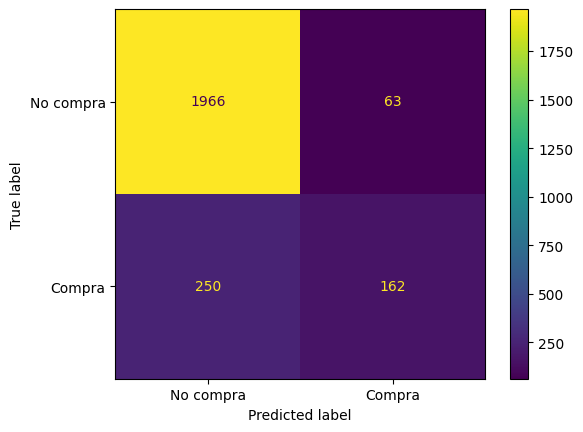

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mc = confusion_matrix(y_test, y_pred)

mc_display = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=['No compra', 'Compra'])
mc_display.plot()
plt.show()

In [61]:
tn, fp, fn, tp = mc.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision test: {precision}')
print(f'Recall test: {recall}')
print(f'Especificidad test: {especificidad}')
print(f'F1 score test: {f1_score}')

Precision test: 0.72
Recall test: 0.3932038834951456
Especificidad test: 0.9689502217841302
F1 score test: 0.5086342229199372


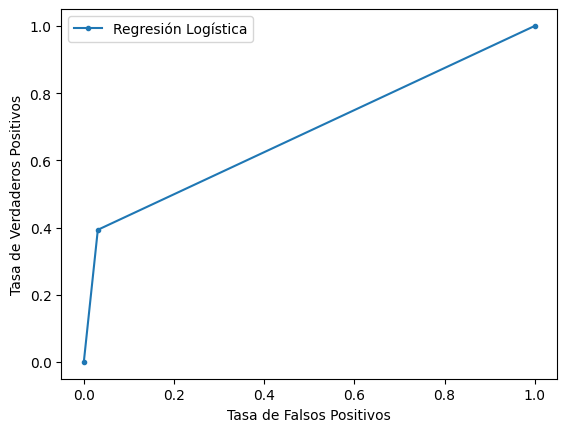

In [62]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# Calculamos las curvas ROC
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# Pintamos las curvas ROC
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')

# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

### **1.2. Regresión logística con tunning de hiperparámetros**

In [64]:
from sklearn.model_selection import RandomizedSearchCV
import pprint

In [65]:
# Modelo base
print("+----------------------\nModelo Base - Regresión logística:")
pprint.pprint(modelo.get_params())

+----------------------
Modelo Base - Regresión logística:
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [69]:
parameters = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': 'balanced',
    'max_iter': [100,200,500,1000],
    'n_jobs': -1
}

In [70]:
# Búsqueda aleatoria

# Definición de cuadricula de búsqueda
rand_svm = RandomizedSearchCV(modelo, param_distributions=parameters, n_iter=20, cv=5, verbose=True)

# Iniciar la búsqueda
rand_svm.fit(x_train, y_train)

TypeError: Parameter grid for parameter 'n_jobs' is not iterable or a distribution (value=-1)

## **2. Random Forest**

## **3. Gradient Boosting Machine**

## **4. Support vector machine**